# EDA

참고: https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools

<BarContainer object of 10 artists>

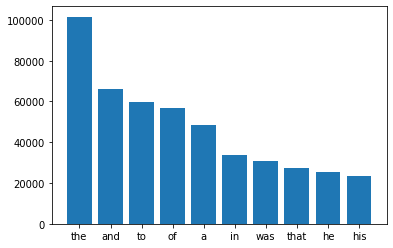

In [ ]:
corpus=[]
new= train['text'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
        
import matplotlib.pyplot as plt
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y)

<AxesSubplot:>

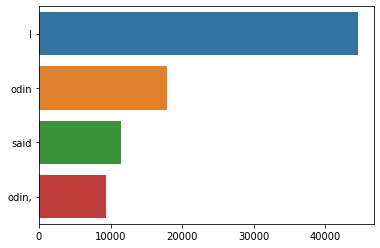

In [ ]:
from collections import Counter
import seaborn as sns
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)

sns.barplot(x=y,y=x)

In [ ]:
from nltk.util import ngrams
import sys 
from sklearn.feature_extraction.text import CountVectorizer

def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= train['text'].str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

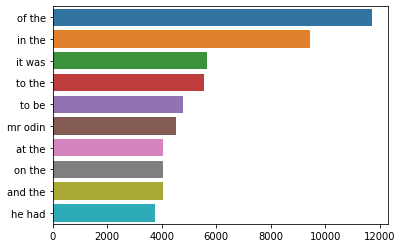

In [ ]:
plot_top_ngrams_barchart(train['text'],2)

Topic modeling exploration with pyLDAvis

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('omw-1.4')
def preprocess_news(df):
    corpus=[]
    stem=PorterStemmer()
    lem=WordNetLemmatizer()
    for news in train['text']:
        words=[w for w in word_tokenize(news) if (w not in stop)]

        words=[lem.lemmatize(w) for w in words if len(w)>2]

        corpus.append(words)
    return corpus

corpus=preprocess_news(train)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
import gensim
dic=gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]

In [ ]:
lda_model = gensim.models.LdaMulticore(bow_corpus,
                                   num_topics = 4,
                                   id2word = dic,
                                   passes = 10,
                                   workers = 2)
lda_model.show_topics()

[(0,
  '0.013*"The" + 0.010*"upon" + 0.008*"one" + 0.005*"day" + 0.004*"man" + 0.004*"like" + 0.004*"night" + 0.004*"great" + 0.004*"would" + 0.004*"There"'),
 (1,
  '0.025*"odin" + 0.012*"The" + 0.010*"hand" + 0.009*"upon" + 0.009*"face" + 0.008*"eye" + 0.006*"looked" + 0.006*"door" + 0.006*"room" + 0.006*"one"'),
 (2,
  '0.050*"odin" + 0.042*"said" + 0.017*"You" + 0.015*"know" + 0.011*"And" + 0.010*"say" + 0.010*"What" + 0.010*"cried" + 0.009*"Mr." + 0.009*"come"'),
 (3,
  '0.042*"odin" + 0.010*"would" + 0.010*"could" + 0.006*"Mr." + 0.006*"one" + 0.006*"much" + 0.005*"time" + 0.005*"She" + 0.005*"But" + 0.005*"The"')]

In [ ]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 44.1 MB/s eta 0:00:00


In [ ]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dic)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.082157  0.018595       1        1  37.011504
2      0.208884  0.005150       2        1  24.927568
1     -0.126503 -0.171169       3        1  24.876521
0     -0.164538  0.147425       4        1  13.184407, topic_info=      Term          Freq         Total Category  logprob  loglift
44    said  12701.000000  12701.000000  Default  30.0000  30.0000
153    You   4802.000000   4802.000000  Default  29.0000  29.0000
16    odin  38131.000000  38131.000000  Default  28.0000  28.0000
476   know   4636.000000   4636.000000  Default  27.0000  27.0000
1      The   7202.000000   7202.000000  Default  26.0000  26.0000
..     ...           ...           ...      ...      ...      ...
36    last    350.322101   2457.619900   Topic4  -6.0385   0.0780
356   made    325.671069   2625.159437   Topic4  -6.1115  -0.0609
758  might    317.556234   2469.172670   Topic4  -6.1367  -0.0248
113   time    286.733852   4439.033058   Topic4  -6.2388  -0.7135
284   come    279.991518   3507.444564   Topic4  -6.2626  -0.5017

[345 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
4719      2  0.997969  'What
149       2  0.996967   'You
779       2  0.998789    'll
4690      2  0.997482    're
2641      2  0.999269    've
...     ...       ...    ...
635       2  0.998827    yes
583       1  0.553382  young
583       2  0.237862  young
583       3  0.192245  young
583       4  0.016292  young

[656 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 2, 1])

# Version1

## Importing / Library

In [ ]:
import warnings 
warnings.filterwarnings(action='ignore')
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import re
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#train = pd.read_csv("/content/drive/MyDrive/KUBIG DL(NLP) 2023-02/A팀/train.csv")
train=pd.read_csv("/content/drive/MyDrive/고려대/소설 작가 분류 AI 경진대회_data/train.csv")
#test = pd.read_csv("/content/drive/MyDrive/KUBIG DL(NLP) 2023-02/A팀/test_x.csv")
test = pd.read_csv("/content/drive/MyDrive/고려대/소설 작가 분류 AI 경진대회_data/test_x.csv")
#sample_submission = pd.read_csv("/content/drive/MyDrive/KUBIG DL(NLP) 2023-02/A팀/sample_submission.csv")
sample_submission = pd.read_csv("/content/drive/MyDrive/고려대/소설 작가 분류 AI 경진대회_data/sample_submission.csv")
print(train.shape, test.shape, sample_submission.shape)
pd.set_option('max_colwidth', 200)
train.head()

(54879, 3) (19617, 2) (19617, 6)


,index,text,author
0,0,"He was almost choking. There was so much, so much he wanted to say, but strange exclamations were all that came from his lips. The Pole gazed fixedly at him, at the bundle of notes in his hand; lo...",3
1,1,"“Your sister asked for it, I suppose?”",2
2,2,"She was engaged one day as she walked, in perusing Jane’s last letter, and dwelling on some passages which proved that Jane had not written in spirits, when, instead of being again surprised by M...",1
3,3,"The captain was in the porch, keeping himself carefully out of the way of a treacherous shot, should any be intended. He turned and spoke to us, “Doctor's watch on the lookout. Dr. odin take the n...",4
4,4,"“Have mercy, gentlemen!” odin flung up his hands. “Don’t write that, anyway; have some shame. Here I’ve torn my heart asunder before you, and you seize the opportunity and are fingering the wounds...",3


In [ ]:
!pip install konlpy
from konlpy.tag import Okt

In [ ]:
import sys, os, re, csv, codecs, numpy as np, pandas as pd
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers

## Embedding , Tokenizer, padding

In [ ]:
EMBEDDING_FILE='/content/drive/MyDrive/고려대/소설 작가 분류 AI 경진대회_data/glove.txt'

In [ ]:
embed_size = 100 # how big is each word vector
max_features = 20000 # how many unique words to use (i.e num rows in embedding vector)
maxlen = 100 # max number of words in a comment to use

In [ ]:
list_sentences_train = train["text"].fillna("_na_").values
y = train['author'].values
list_sentences_test = test["text"].fillna("_na_").values

In [ ]:
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(list_sentences_train))
list_tokenized_train = tokenizer.texts_to_sequences(list_sentences_train)
list_tokenized_test = tokenizer.texts_to_sequences(list_sentences_test)
X_t = pad_sequences(list_tokenized_train, maxlen=maxlen)
X_te = pad_sequences(list_tokenized_test, maxlen=maxlen)

In [ ]:
def get_coefs(word,*arr): return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.strip().split()) for o in open(EMBEDDING_FILE))

In [ ]:
all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
print(emb_mean,emb_std)

-0.007239929 0.36241692


In [ ]:
word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector

**GRU 레이어 사용**

In [ ]:
#GRU 레이어 사용하기
inp = Input(shape=(maxlen,))
x = Embedding(max_features, embed_size, weights=[embedding_matrix])(inp)
x = Bidirectional(GRU(64, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))(x)
x = GlobalMaxPool1D()(x)
x = Dense(50, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(6, activation="sigmoid")(x)
model = Model(inputs=inp, outputs=x)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding_2 (Embedding)     (None, 100, 100)          2000000   
                                                                 
 bidirectional_2 (Bidirectio  (None, 100, 100)         60400     
 nal)                                                            
                                                                 
 global_max_pooling1d_2 (Glo  (None, 100)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_4 (Dense)             (None, 50)                5050      
                                                                 
 dropout_2 (Dropout)         (None, 50)                0   

In [ ]:
model.fit(X_t, y, batch_size=32, epochs=2, validation_split=0.1);

Epoch 1/2
1544/1544 [==============================] - 613s 392ms/step - loss: 1.0774 - accuracy: 0.5673 - val_loss: 0.7589 - val_accuracy: 0.7105
Epoch 2/2
1544/1544 [==============================] - 599s 388ms/step - loss: 0.5946 - accuracy: 0.7818 - val_loss: 0.5930 - val_accuracy: 0.7819


In [ ]:
y_test = model.predict([X_te], batch_size=1024, verbose=1)
y_test1 = np.round(y_test,4)

20/20 [==============================] - 15s 654ms/step


In [ ]:
submiss = sample_submission
submiss['0']=y_test1[:,0]
submiss['1']=y_test1[:,1]
submiss['2']=y_test1[:,2]
submiss['3']=y_test1[:,3]
submiss['4']=y_test1[:,4]
submiss.to_csv("/content/drive/MyDrive/KUBIG DL(NLP) 2023-02/A팀/submission1.csv",index=False)

# Version2


## Importing / Preprocessing

Removing punctuation

In [ ]:
import string
punct = string.punctuation
punct = punct +"“" + "”"
def remove_punctuation(text_sentence):
    text = "".join([word for word in text_sentence if word not in punct])
    return text
train['text_nopunct'] = train['text'].apply(lambda x: remove_punctuation(x))
test['text_nopunct'] = test['text'].apply(lambda x: remove_punctuation(x))
train.head()
    

,index,text,author,text_nopunct
0,0,"He was almost choking. There was so much, so much he wanted to say, but strange exclamations were all that came from his lips. The Pole gazed fixedly at him, at the bundle of notes in his hand; lo...",3,He was almost choking There was so much so much he wanted to say but strange exclamations were all that came from his lips The Pole gazed fixedly at him at the bundle of notes in his hand looked a...
1,1,"“Your sister asked for it, I suppose?”",2,Your sister asked for it I suppose
2,2,"She was engaged one day as she walked, in perusing Jane’s last letter, and dwelling on some passages which proved that Jane had not written in spirits, when, instead of being again surprised by M...",1,She was engaged one day as she walked in perusing Jane’s last letter and dwelling on some passages which proved that Jane had not written in spirits when instead of being again surprised by Mr od...
3,3,"The captain was in the porch, keeping himself carefully out of the way of a treacherous shot, should any be intended. He turned and spoke to us, “Doctor's watch on the lookout. Dr. odin take the n...",4,The captain was in the porch keeping himself carefully out of the way of a treacherous shot should any be intended He turned and spoke to us Doctors watch on the lookout Dr odin take the north sid...
4,4,"“Have mercy, gentlemen!” odin flung up his hands. “Don’t write that, anyway; have some shame. Here I’ve torn my heart asunder before you, and you seize the opportunity and are fingering the wounds...",3,Have mercy gentlemen odin flung up his hands Don’t write that anyway have some shame Here I’ve torn my heart asunder before you and you seize the opportunity and are fingering the wounds in both h...


Tokenizer

In [ ]:
import re
def tokenize(text_sentence): 
    token = re.split('\W+', text_sentence)
    return token
train['text_tokenize'] = train['text'].apply(lambda x: tokenize(x))
test['text_tokenize'] = test['text'].apply(lambda x: tokenize(x))
train.head()

,index,text,author,text_nopunct,text_tokenize
0,0,"He was almost choking. There was so much, so much he wanted to say, but strange exclamations were all that came from his lips. The Pole gazed fixedly at him, at the bundle of notes in his hand; lo...",3,He was almost choking There was so much so much he wanted to say but strange exclamations were all that came from his lips The Pole gazed fixedly at him at the bundle of notes in his hand looked a...,"[He, was, almost, choking, There, was, so, much, so, much, he, wanted, to, say, but, strange, exclamations, were, all, that, came, from, his, lips, The, Pole, gazed, fixedly, at, him, at, the, bun..."
1,1,"“Your sister asked for it, I suppose?”",2,Your sister asked for it I suppose,"[, Your, sister, asked, for, it, I, suppose, ]"
2,2,"She was engaged one day as she walked, in perusing Jane’s last letter, and dwelling on some passages which proved that Jane had not written in spirits, when, instead of being again surprised by M...",1,She was engaged one day as she walked in perusing Jane’s last letter and dwelling on some passages which proved that Jane had not written in spirits when instead of being again surprised by Mr od...,"[, She, was, engaged, one, day, as, she, walked, in, perusing, Jane, s, last, letter, and, dwelling, on, some, passages, which, proved, that, Jane, had, not, written, in, spirits, when, instead, o..."
3,3,"The captain was in the porch, keeping himself carefully out of the way of a treacherous shot, should any be intended. He turned and spoke to us, “Doctor's watch on the lookout. Dr. odin take the n...",4,The captain was in the porch keeping himself carefully out of the way of a treacherous shot should any be intended He turned and spoke to us Doctors watch on the lookout Dr odin take the north sid...,"[The, captain, was, in, the, porch, keeping, himself, carefully, out, of, the, way, of, a, treacherous, shot, should, any, be, intended, He, turned, and, spoke, to, us, Doctor, s, watch, on, the, ..."
4,4,"“Have mercy, gentlemen!” odin flung up his hands. “Don’t write that, anyway; have some shame. Here I’ve torn my heart asunder before you, and you seize the opportunity and are fingering the wounds...",3,Have mercy gentlemen odin flung up his hands Don’t write that anyway have some shame Here I’ve torn my heart asunder before you and you seize the opportunity and are fingering the wounds in both h...,"[, Have, mercy, gentlemen, odin, flung, up, his, hands, Don, t, write, that, anyway, have, some, shame, Here, I, ve, torn, my, heart, asunder, before, you, and, you, seize, the, opportunity, and, ..."


Stopword

In [ ]:
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
def remove_stopword(text_sentence): 
    text = [word for word in text_sentence if word not in stopwords]
    return text
train['text_nostopword'] = train['text_tokenize'].apply(lambda x: remove_stopword(x))
test['text_nostopword'] = test['text_tokenize'].apply(lambda x: remove_stopword(x))
train.head()

Lemmatisation

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
wm = nltk.WordNetLemmatizer()
def lemmatize(text_sentence):
    text = [wm.lemmatize(word) for word in text_sentence]
    return text
train['text_lemmatize'] = train['text_tokenize'].apply(lambda x : lemmatize(x))
test['text_lemmatize'] = test['text_tokenize'].apply(lambda x : lemmatize(x))
test.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


,index,text,text_nopunct,text_tokenize,text_lemmatize
0,0,"“Not at all. I think she is one of the most charming young ladies I ever met, and might have been most useful in such work as we have been doing. She had a decided genius that way: witness the way...",Not at all I think she is one of the most charming young ladies I ever met and might have been most useful in such work as we have been doing She had a decided genius that way witness the way in w...,"[, Not, at, all, I, think, she, is, one, of, the, most, charming, young, ladies, I, ever, met, and, might, have, been, most, useful, in, such, work, as, we, have, been, doing, She, had, a, decided...","[, Not, at, all, I, think, she, is, one, of, the, most, charming, young, lady, I, ever, met, and, might, have, been, most, useful, in, such, work, a, we, have, been, doing, She, had, a, decided, g..."
1,1,"""No,"" replied he, with sudden consciousness, ""not to find it in YOU; for I cannot be ignorant that to you, to your goodness, I owe it all.--I feel it--I would express it if I could--but, as you we...",No replied he with sudden consciousness not to find it in YOU for I cannot be ignorant that to you to your goodness I owe it allI feel itI would express it if I couldbut as you well know I am no o...,"[, No, replied, he, with, sudden, consciousness, not, to, find, it, in, YOU, for, I, cannot, be, ignorant, that, to, you, to, your, goodness, I, owe, it, all, I, feel, it, I, would, express, it, i...","[, No, replied, he, with, sudden, consciousness, not, to, find, it, in, YOU, for, I, cannot, be, ignorant, that, to, you, to, your, goodness, I, owe, it, all, I, feel, it, I, would, express, it, i..."
2,2,"As the lady had stated her intention of screaming, of course she would have screamed at this additional boldness, but that the exertion was rendered unnecessary by a hasty knocking at the door: wh...",As the lady had stated her intention of screaming of course she would have screamed at this additional boldness but that the exertion was rendered unnecessary by a hasty knocking at the door which...,"[As, the, lady, had, stated, her, intention, of, screaming, of, course, she, would, have, screamed, at, this, additional, boldness, but, that, the, exertion, was, rendered, unnecessary, by, a, has...","[As, the, lady, had, stated, her, intention, of, screaming, of, course, she, would, have, screamed, at, this, additional, boldness, but, that, the, exertion, wa, rendered, unnecessary, by, a, hast..."
3,3,“And then suddenly in the silence I heard a sound which sent my heart into my mouth. It was the clank of the levers and the swish of the leaking cylinder. He had set the engine at work. The lamp s...,And then suddenly in the silence I heard a sound which sent my heart into my mouth It was the clank of the levers and the swish of the leaking cylinder He had set the engine at work The lamp still...,"[, And, then, suddenly, in, the, silence, I, heard, a, sound, which, sent, my, heart, into, my, mouth, It, was, the, clank, of, the, levers, and, the, swish, of, the, leaking, cylinder, He, had, s...","[, And, then, suddenly, in, the, silence, I, heard, a, sound, which, sent, my, heart, into, my, mouth, It, wa, the, clank, of, the, lever, and, the, swish, of, the, leaking, cylinder, He, had, set..."
4,4,"His conviction remained unchanged. So far as I know--and I believe his honest heart was transparent to me--he never wavered again, in his solemn certainty of finding her. His patience never tired....",His conviction remained unchanged So far as I knowand I believe his honest heart was transparent to mehe never wavered again in his solemn certainty of finding her His patience never tired And alt...,"[His, conviction, remained, unchanged, So, far, as, I, know, and, I, believe, his, honest, heart, was, transparent, to, me, he, never, wavered, again, in, his, solemn, certainty, of, finding, her,...","[His, conviction, remained, unchanged, So, far, a, I, know, and, I, believe, his, honest, heart,

## Tuning start

Hyper-parameter

In [ ]:
vocab_size = 10000
embedding_dim = 100
max_len = 250
trunc_type = "post"
oov_tok = "<OOV>"
training_size = 20000

Tokenization and padding

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train['text_lemmatize'])
word_index = tokenizer.word_index

train_word_sequence = tokenizer.texts_to_sequences(train['text_lemmatize'])
train_padd_sequence = pad_sequences(train_word_sequence, maxlen=max_len, truncating=trunc_type)

test_word_sequence = tokenizer.texts_to_sequences(test['text_lemmatize'])
test_padd_sequence = pad_sequences(test_word_sequence, maxlen=max_len, truncating=trunc_type)

Modeling

**LSTM 사용**

In [ ]:
import keras
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_len),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation = "relu"),
    tf.keras.layers.Dense(5, activation = "sigmoid")
])
model.summary()
model.compile(optimizer="adam", loss=keras.losses.SparseCategoricalCrossentropy(), metrics = ["accuracy"])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 250, 100)          1000000   
                                                                 
 bidirectional (Bidirectiona  (None, 250, 128)         84480     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 5)                 325       
                                                                 
Total params: 1,130,181
Trainable params: 1,130,181
Non-

In [ ]:
history = model.fit(train_padd_sequence, train['author'], epochs = 2)

Epoch 1/2
1715/1715 [==============================] - 136s 71ms/step - loss: 1.0545 - accuracy: 0.5848
Epoch 2/2
1715/1715 [==============================] - 60s 35ms/step - loss: 0.6801 - accuracy: 0.7518


In [ ]:
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)

history1 = model.fit(train_padd_sequence, train['author'],
                    epochs = 25,
                    callbacks =[earlystopping])

Epoch 1/25
1714/1715 [============================>.] - ETA: 0s - loss: 0.5291 - accuracy: 0.8080

1715/1715 [==============================] - 58s 34ms/step - loss: 0.5290 - accuracy: 0.8080
Epoch 2/25
1714/1715 [============================>.] - ETA: 0s - loss: 0.4459 - accuracy: 0.8393

1715/1715 [==============================] - 55s 32ms/step - loss: 0.4458 - accuracy: 0.8394
Epoch 3/25
1714/1715 [============================>.] - ETA: 0s - loss: 0.3866 - accuracy: 0.8591

1715/1715 [==============================] - 54s 31ms/step - loss: 0.3866 - accuracy: 0.8591
Epoch 4/25
1715/1715 [==============================] - ETA: 0s - loss: 0.3318 - accuracy: 0.8809

1715/1715 [==============================] - 56s 33ms/step - loss: 0.3318 - accuracy: 0.8809
Epoch 5/25
1714/1715 [============================>.] - ETA: 0s - loss: 0.2901 - accuracy: 0.8945

1715/1715 [==============================] - 54s 32ms/step - loss: 0.2901 - accuracy: 0.8945
Epoch 6/25
1714/1715 [============================>.] - ETA: 0s - loss: 0.2501 - accuracy: 0.9098

1715/1715 [==============================] - 54s 31ms/step - loss: 0.2500 - accuracy: 0.9098
Epoch 7/25
1714/1715 [============================>.] - ETA: 0s - loss: 0.2211 - accuracy: 0.9197

1715/1715 [==============================] - 55s 32ms/step - loss: 0.2211 - accuracy: 0.9197
Epoch 8/25
1714/1715 [============================>.] - ETA: 0s - loss: 0.1958 - accuracy: 0.9289

1715/1715 [==============================] - 53s 31ms/step - loss: 0.1958 - accuracy: 0.9289
Epoch 9/25
1715/1715 [==============================] - ETA: 0s - loss: 0.1729 - accuracy: 0.9362

1715/1715 [==============================] - 54s 31ms/step - loss: 0.1729 - accuracy: 0.9362
Epoch 10/25
1715/1715 [==============================] - ETA: 0s - loss: 0.1544 - accuracy: 0.9436

1715/1715 [==============================] - 53s 31ms/step - loss: 0.1544 - accuracy: 0.9436
Epoch 11/25
1715/1715 [==============================] - ETA: 0s - loss: 0.1380 - accuracy: 0.9490

1715/1715 [==============================] - 53s 31ms/step - loss: 0.1380 - accuracy: 0.9490
Epoch 12/25
1714/1715 [============================>.] - ETA: 0s - loss: 0.1273 - accuracy: 0.9531

1715/1715 [==============================] - 53s 31ms/step - loss: 0.1272 - accuracy: 0.9532
Epoch 13/25
1714/1715 [============================>.] - ETA: 0s - loss: 0.1106 - accuracy: 0.9597

1715/1715 [==============================] - 54s 31ms/step - loss: 0.1106 - accuracy: 0.9597
Epoch 14/25
1715/1715 [==============================] - ETA: 0s - loss: 0.0995 - accuracy: 0.9636

1715/1715 [==============================] - 52s 31ms/step - loss: 0.0995 - accuracy: 0.9636
Epoch 15/25
1714/1715 [============================>.] - ETA: 0s - loss: 0.0899 - accuracy: 0.9668

1715/1715 [==============================] - 53s 31ms/step - loss: 0.0899 - accuracy: 0.9668
Epoch 16/25
1714/1715 [============================>.] - ETA: 0s - loss: 0.0837 - accuracy: 0.9694

1715/1715 [==============================] - 53s 31ms/step - loss: 0.0838 - accuracy: 0.9694
Epoch 17/25
1715/1715 [==============================] - ETA: 0s - loss: 0.0725 - accuracy: 0.9736

1715/1715 [==============================] - 53s 31ms/step - loss: 0.0725 - accuracy: 0.9736
Epoch 18/25
1715/1715 [==============================] - ETA: 0s - loss: 0.0683 - accuracy: 0.9756

1715/1715 [==============================] - 53s 31ms/step - loss: 0.0683 - accuracy: 0.9756
Epoch 19/25
1714/1715 [============================>.] - ETA: 0s - loss: 0.0597 - accuracy: 0.9782

1715/1715 [==============================] - 53s 31ms/step - loss: 0.0598 - accuracy: 0.9782
Epoch 20/25
1715/1715 [==============================] - ETA: 0s - loss: 0.0574 - accuracy: 0.9801

1715/1715 [==============================] - 53s 31ms/step - loss: 0.0574 - accuracy: 0.9801
Epoch 21/25
1715/1715 [==============================] - ETA: 0s - loss: 0.0475 - accuracy: 0.9821

1715/1715 [==============================] - 53s 31ms/step - loss: 0.0475 - accuracy: 0.9821
Epoch 22/25
1714/1715 [============================>.] - ETA: 0s - loss: 0.0432 - accuracy: 0.9846

1715/1715 [==============================] - 54s 31ms/step - loss: 0.0432 - accuracy: 0.9846
Epoch 23/25
1714/1715 [============================>.] - ETA: 0s - loss: 0.0448 - accuracy: 0.9840

1715/1715 [==============================] - 53s 31ms/step - loss: 0.0449 - accuracy: 0.9840
Epoch 24/25
1714/1715 [============================>.] - ETA: 0s - loss: 0.0364 - accuracy: 0.9871

1715/1715 [==============================] - 52s 31ms/step - loss: 0.0364 - accuracy: 0.9871
Epoch 25/25
1714/1715 [============================>.] - ETA: 0s - loss: 0.0352 - accuracy: 0.9877

1715/1715 [==============================] - 53s 31ms/step - loss: 0.0352 - accuracy: 0.9877


In [ ]:
y_test = model.predict([test_padd_sequence], batch_size=1024, verbose=1)
y_test1 = np.round(y_test,4)

20/20 [==============================] - 2s 53ms/step


In [ ]:
sample  = pd.read_csv("/content/drive/MyDrive/고려대/소설 작가 분류 AI 경진대회_data/sample_submission.csv", index_col=0)
print(y_test1.shape)
print(y_test1[:10])
print(sample.head())


(19617, 5)
[[4.700e-03 9.994e-01 8.400e-03 1.200e-03 1.700e-03]
 [6.229e-01 8.390e-01 0.000e+00 3.100e-03 2.925e-01]
 [1.000e+00 2.000e-04 1.000e-04 1.700e-03 4.000e-04]
 [1.100e-03 2.750e-02 9.999e-01 4.530e-02 6.000e-04]
 [9.998e-01 0.000e+00 2.000e-04 4.073e-01 5.000e-04]
 [8.880e-02 1.000e-04 1.500e-03 9.999e-01 4.900e-03]
 [9.159e-01 1.800e-03 2.000e-04 9.825e-01 2.000e-04]
 [1.000e+00 1.000e-04 5.000e-04 3.000e-03 1.000e-04]
 [1.000e+00 2.000e-04 0.000e+00 5.000e-04 1.000e-04]
 [9.220e-01 2.000e-04 4.000e-04 9.544e-01 3.583e-01]]
       0  1  2  3  4
index               
0      0  0  0  0  0
1      0  0  0  0  0
2      0  0  0  0  0
3      0  0  0  0  0
4      0  0  0  0  0


In [ ]:
sample[sample.columns] = y_test1
sample.head()
sample.to_csv("/content/drive/MyDrive/고려대/소설 작가 분류 AI 경진대회_data/submission2.csv")